In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [62]:
import yfinance as yf

In [64]:
from datetime import datetime #to extract past data
end = datetime.now() #To gather data for now
start = datetime(end.year-20, end.month, end.day) #to extract last 20 years data

In [66]:
stock = "GOOG" #choosing a stock
google_data = yf.download(stock, start, end) #Downloading stock data

[*********************100%***********************]  1 of 1 completed


In [68]:
google_data.head() #Shows first 5 rows of googles data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-12,4.613458,4.727281,4.418439,4.533009,4.521904,672354740
2004-11-15,4.494404,4.690419,4.452063,4.604491,4.593211,477844390
2004-11-16,4.420929,4.469995,4.254802,4.297392,4.286864,839832142
2004-11-17,4.209721,4.420929,4.209223,4.296396,4.285871,728034662
2004-11-18,4.241352,4.344217,4.127778,4.172859,4.162636,667677273


In [70]:
google_data.shape #Provides us total number of rows and columns in the data

(5033, 6)

In [72]:
google_data.describe() #Gives us insight in the data

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,47.496812,47.995678,47.022718,47.515795,47.405542,1.113252e+08
std,45.368230,45.864308,44.923347,45.393780,45.299144,1.442565e+08
min,4.096396,4.221676,4.017691,4.112087,4.102013,1.584340e+05
25%,13.265029,13.379849,13.102389,13.241368,13.208930,2.671800e+07
50%,27.781227,27.912367,27.553225,27.741835,27.673872,5.208260e+07
75%,62.280499,62.994499,61.846500,62.403999,62.251122,1.358112e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [74]:
google_data.info() #to find out the data format

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-11-12 to 2024-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [76]:
google_data.isna().sum() #to find any null values in the dataset

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of Data')

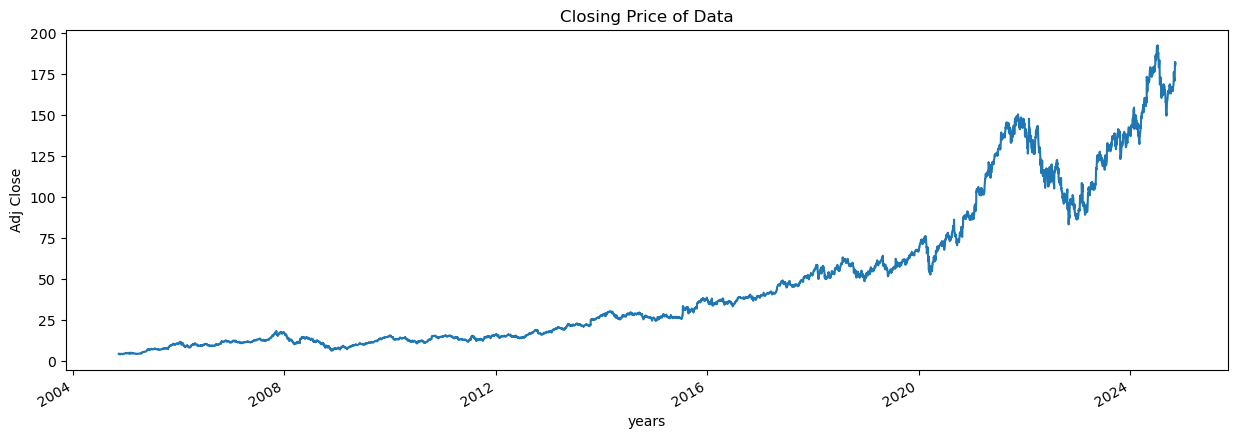

In [80]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Data")

In [82]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize = figsize)
    values.plot()
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Data")

In [84]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

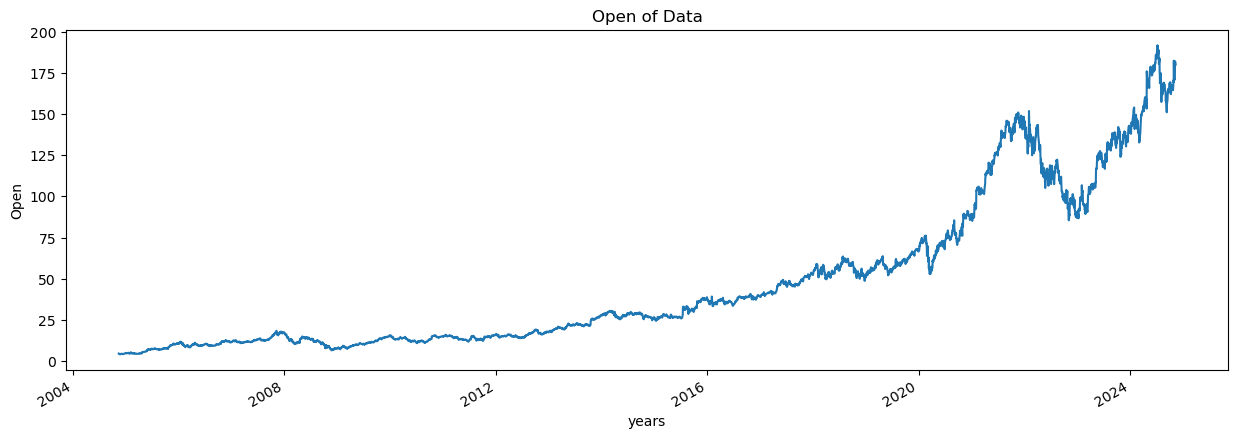

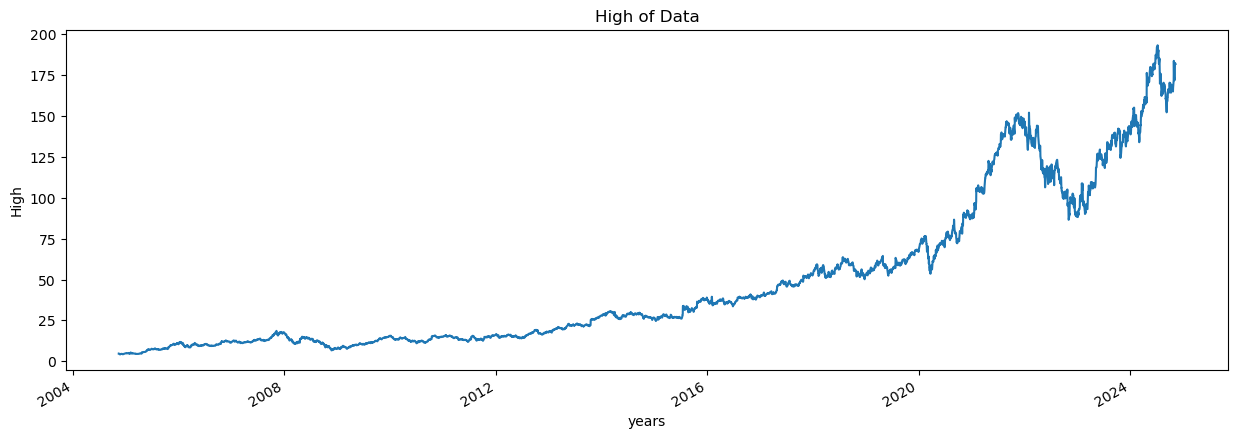

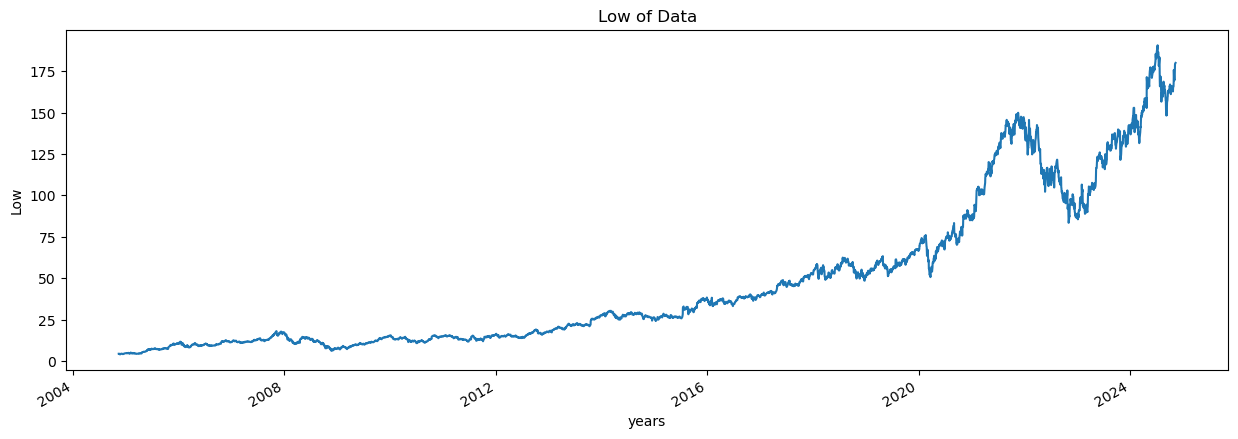

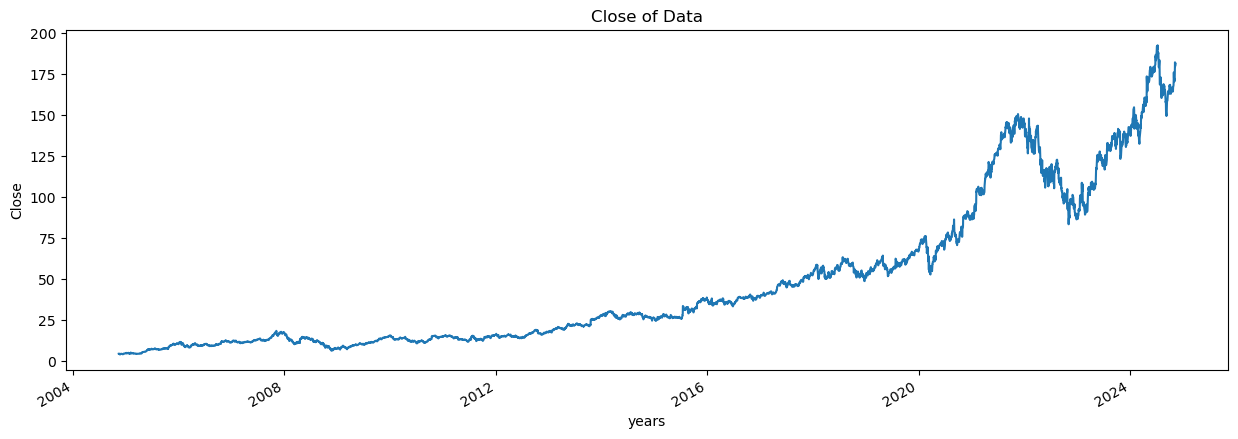

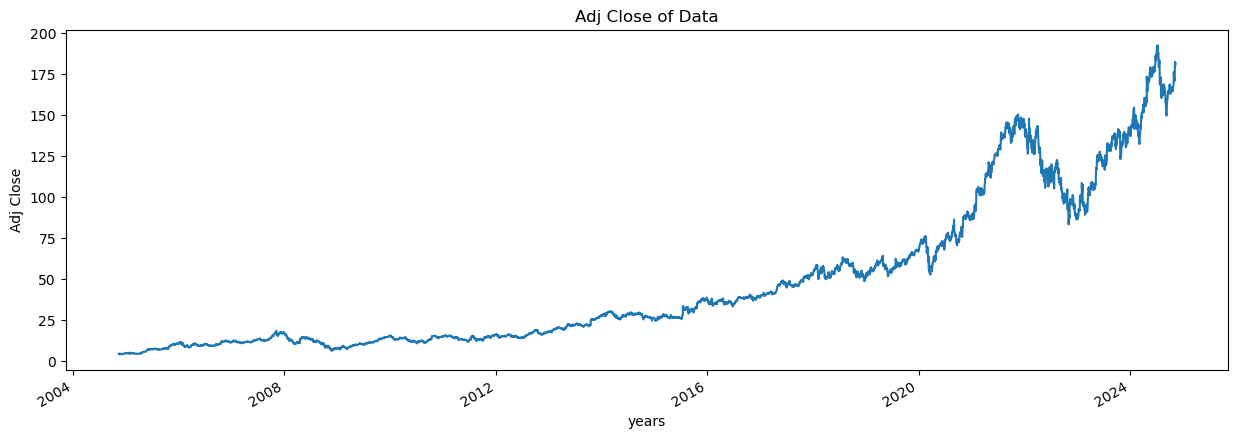

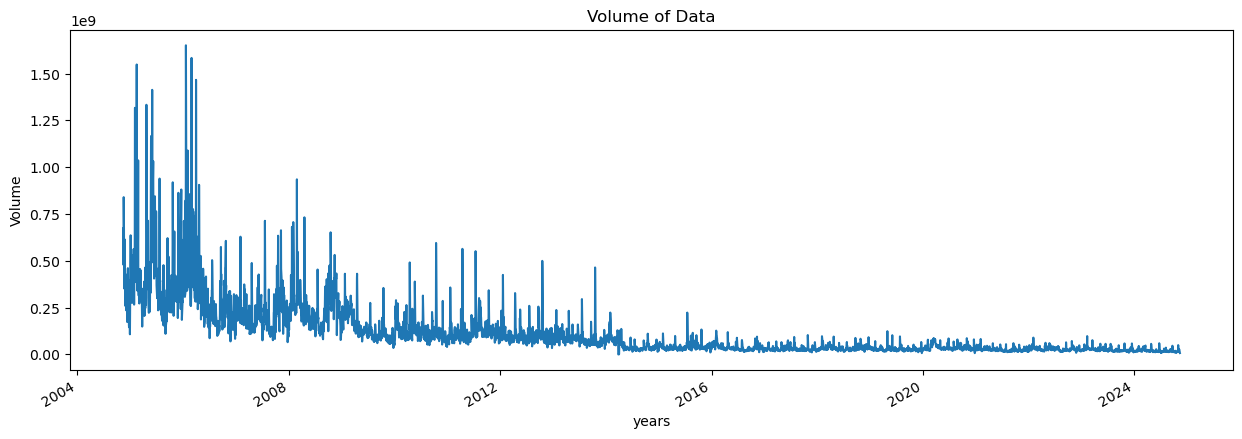

In [86]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [87]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [90]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [92]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [94]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [96]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 34
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 218


In [98]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [100]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-11-02         NaN
2005-11-03         NaN
2005-11-04         NaN
2005-11-07         NaN
2005-11-08    6.085531
Name: MA_for_250_days, dtype: float64

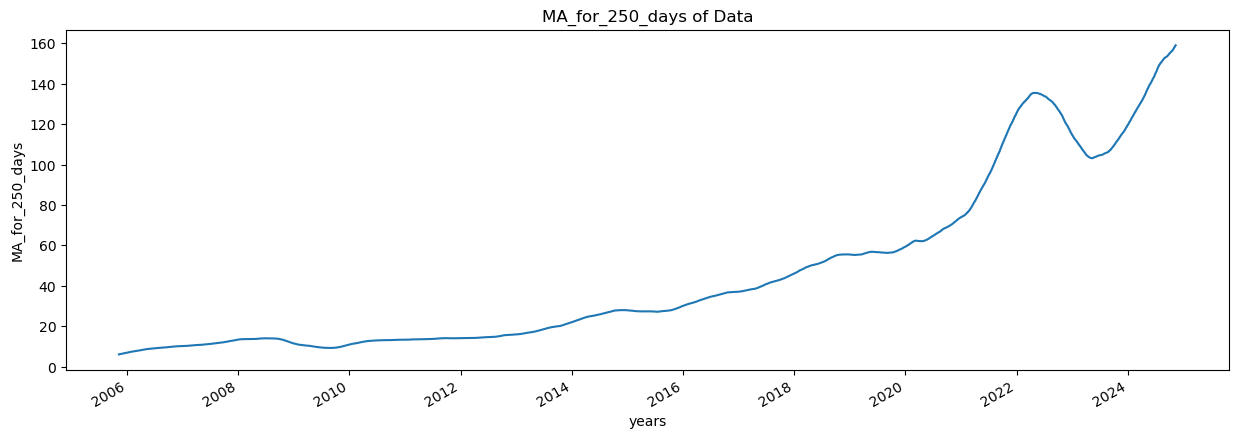

In [102]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

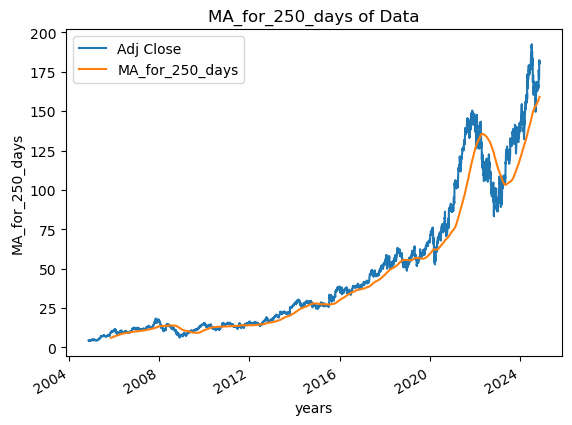

In [104]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

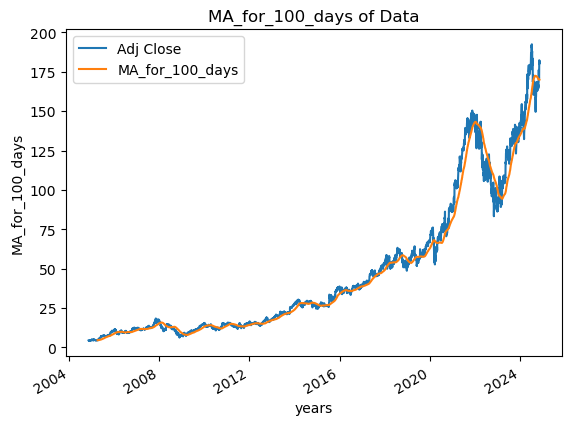

In [106]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

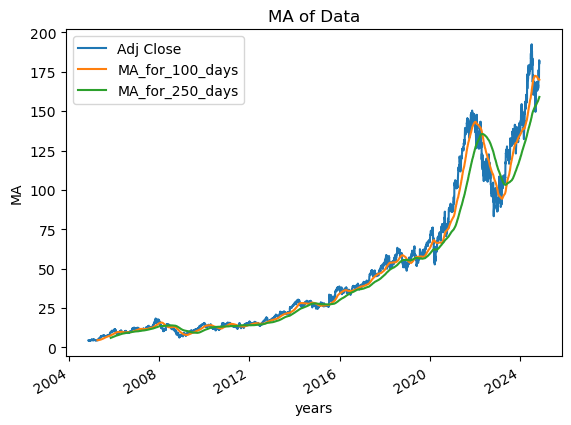

In [108]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [110]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-11-12,4.521904,NaN
2004-11-15,4.593211,0.015769
2004-11-16,4.286864,-0.066695
2004-11-17,4.285871,-0.000232
2004-11-18,4.162636,-0.028754


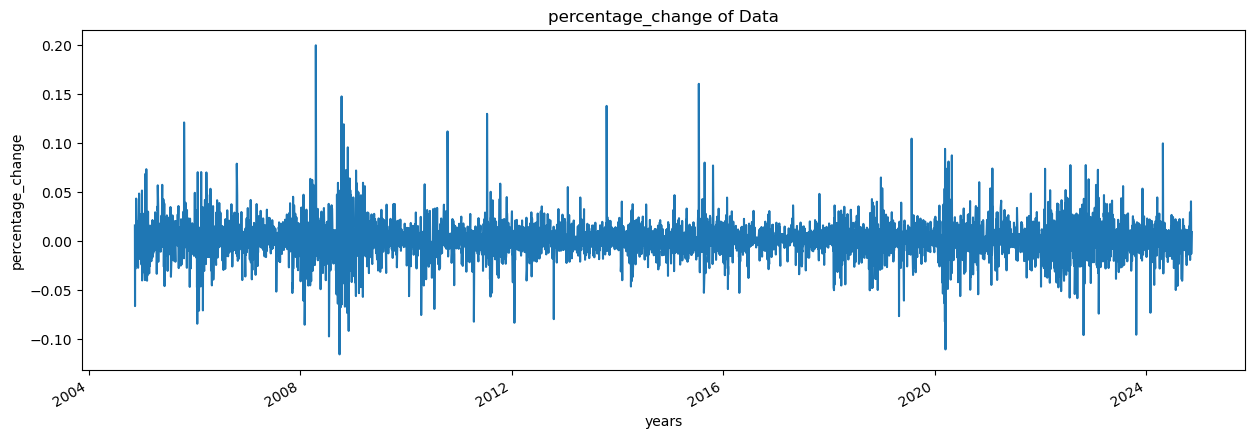

In [112]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [114]:
Adj_close_price = google_data[['Adj Close']]

In [116]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([4.10201311]))

In [118]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00222985],
       [0.00260853],
       [0.00098166],
       ...,
       [0.94622161],
       [0.93337011],
       [0.94197316]])

In [120]:
len(scaled_data)

5033

In [122]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [124]:
x_data[0],y_data[0]

(array([[0.00222985],
        [0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127458],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0.00496241],
        [0.00387914],
        [0.00374852],
        [0.00309408],
        [0.00379338],
        [0.00395304],
        [0.00375248],
        [0.00399526],
        [0.00398866],
        [0.00460088],
        [0.00511942],
        [0

In [126]:
int(len(x_data)*0.7)

3453

In [128]:
4908-100-int(len(x_data)*0.7)

1355

In [130]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [132]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [134]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [138]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\nisar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [140]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [142]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 175s 48ms/step - loss: 2.3462e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 162s 47ms/step - loss: 7.3869e-05


In [144]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [146]:
predictions = model.predict(x_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step


In [148]:
predictions


array([[0.22742838],
       [0.23387   ],
       [0.23932964],
       ...,
       [0.8134883 ],
       [0.83341056],
       [0.83661556]], dtype=float32)

In [150]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 46.92785],
       [ 48.14084],
       [ 49.16891],
       ...,
       [157.28569],
       [161.03714],
       [161.64066]], dtype=float32)

In [152]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.84567642],
       [ 52.06613541],
       [ 51.72696686],
       ...,
       [182.27999878],
       [179.86000061],
       [181.47999573]])

In [154]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [156]:
rmse

9.68439619156516

In [158]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-12-26,51.845676,46.927849
2018-12-27,52.066135,48.140839
2018-12-28,51.726967,49.168911
2018-12-31,51.653645,49.450954
2019-01-02,52.164394,49.367439


In [160]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-12-26,51.845676,46.927849
2018-12-27,52.066135,48.140839
2018-12-28,51.726967,49.168911
2018-12-31,51.653645,49.450954
2019-01-02,52.164394,49.367439


<Figure size 1500x600 with 0 Axes>

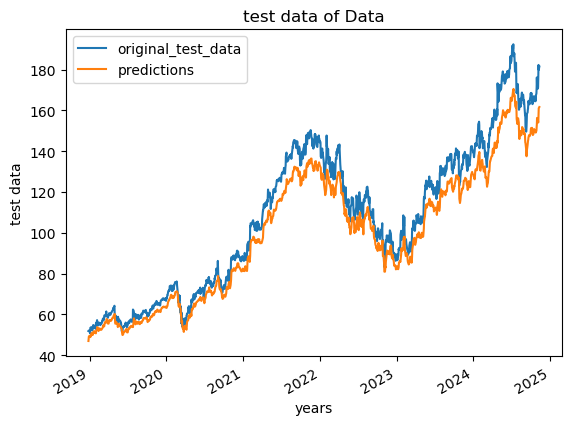

In [162]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

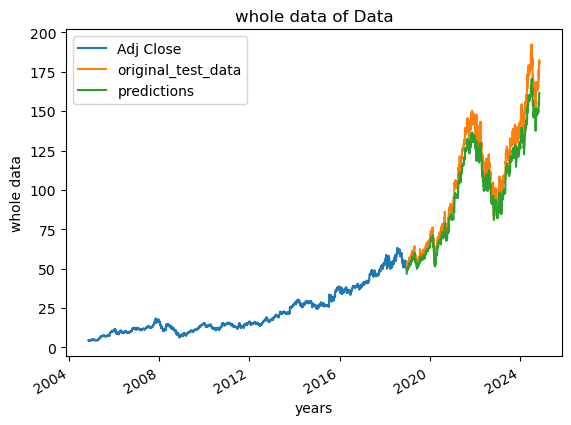

In [164]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [168]:
model.save("Latest_stock_price_model.keras")